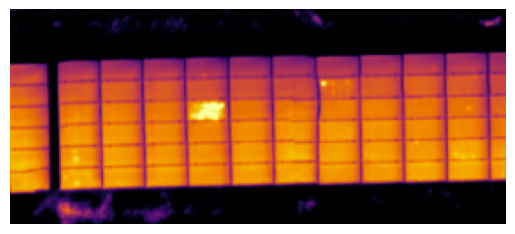

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# plt.rcParams['figure.figsize'] = [15, 10]

# Load the image using OpenCV
image_cv = cv2.imread('img/img2.png')

def showimg(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

# Convert the image from BGR to RGB format
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib to verify it was loaded correctly
showimg(image_cv_rgb)

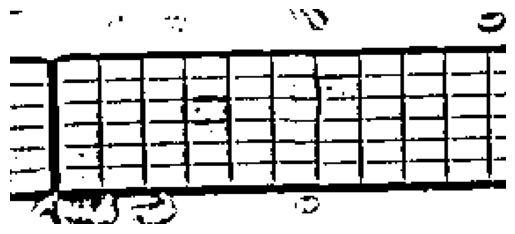

In [2]:
gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
# threshold the image using neighborhood mean
thresh = cv2.adaptiveThreshold(
    gray,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    15,
    5
)

# show the image
showimg(thresh)

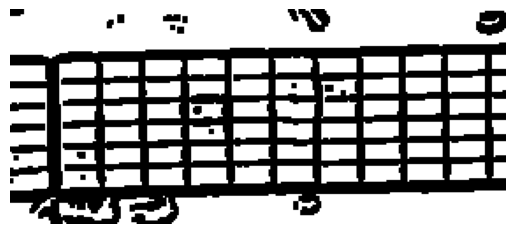

In [3]:
erode = cv2.erode(thresh, None, iterations=1)
showimg(erode)

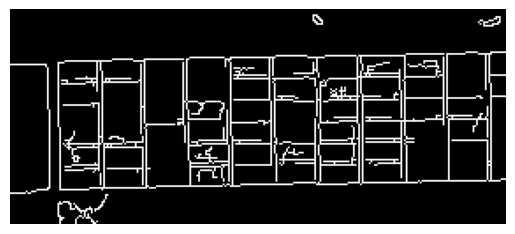

In [4]:
canny = cv2.Canny(gray,0,255)
showimg(canny)

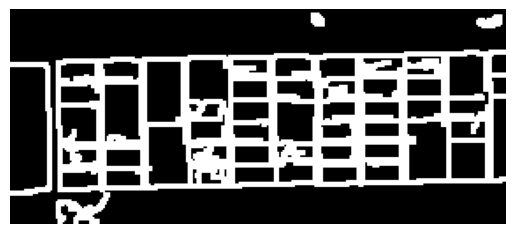

In [5]:
edges = cv2.dilate(canny,None)
showimg(edges)

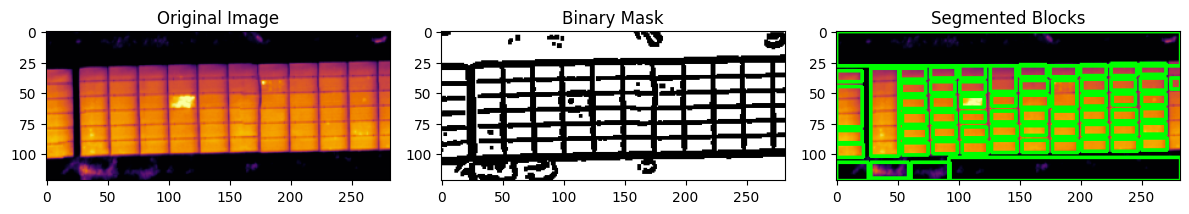

In [6]:
#invert edges
inv_edges = cv2.bitwise_not(edges)
# Find contours
contours, _ = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours (bounding boxes) on the _cv
output = image_cv.copy()
for contour in contours:
    # Filter based on area to ignore noise
    if cv2.contourArea(contour) > 50:  # Adjust threshold as needed
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Binary Mask")
plt.imshow(erode, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Segmented Blocks")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

In [7]:
# for each image in contours crop image and save as new file with new name
for i, contour in enumerate(contours):
    # Filter based on area to ignore noise
    if cv2.contourArea(contour) > 50:  # Adjust threshold as needed
        x, y, w, h = cv2.boundingRect(contour)
        roi = image_cv[y:y+h, x:x+w]
        cv2.imwrite(f"crop/{i}.png", roi)
        print(f"Saved {i}.png")
       


Saved 1.png
Saved 2.png
Saved 3.png
Saved 5.png
Saved 6.png
Saved 7.png
Saved 8.png
Saved 9.png
Saved 10.png
Saved 11.png
Saved 12.png
Saved 13.png
Saved 14.png
Saved 16.png
Saved 17.png
Saved 18.png
Saved 19.png
Saved 20.png
Saved 21.png
Saved 22.png
Saved 23.png
Saved 24.png
Saved 25.png
Saved 27.png
Saved 28.png
Saved 29.png
Saved 30.png
Saved 31.png
Saved 32.png
Saved 33.png
Saved 34.png
Saved 35.png
Saved 37.png
Saved 38.png
Saved 39.png
Saved 40.png
Saved 41.png
Saved 42.png
Saved 43.png
Saved 44.png
Saved 45.png
Saved 47.png
Saved 48.png
Saved 49.png
Saved 50.png
Saved 51.png
Saved 52.png
Saved 53.png
Saved 54.png
Saved 55.png
Saved 56.png
Saved 57.png
Saved 58.png
Saved 59.png
Saved 60.png
Saved 61.png
Saved 62.png
Saved 63.png
Saved 64.png
Saved 65.png
Saved 67.png
Saved 68.png
Saved 71.png
